In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
model = models.Cornish2021()

In [3]:
experiment = pybamm.Experiment(['Charge at 0.0211 A for 11.85 hours'])

param = model.default_parameter_values
param.update( {'Shuttle rate coefficient during charge [s-1]': 100 })

sim = pybamm.Simulation(
    model=model,
    parameter_values = param,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [4]:
sim.solve()

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


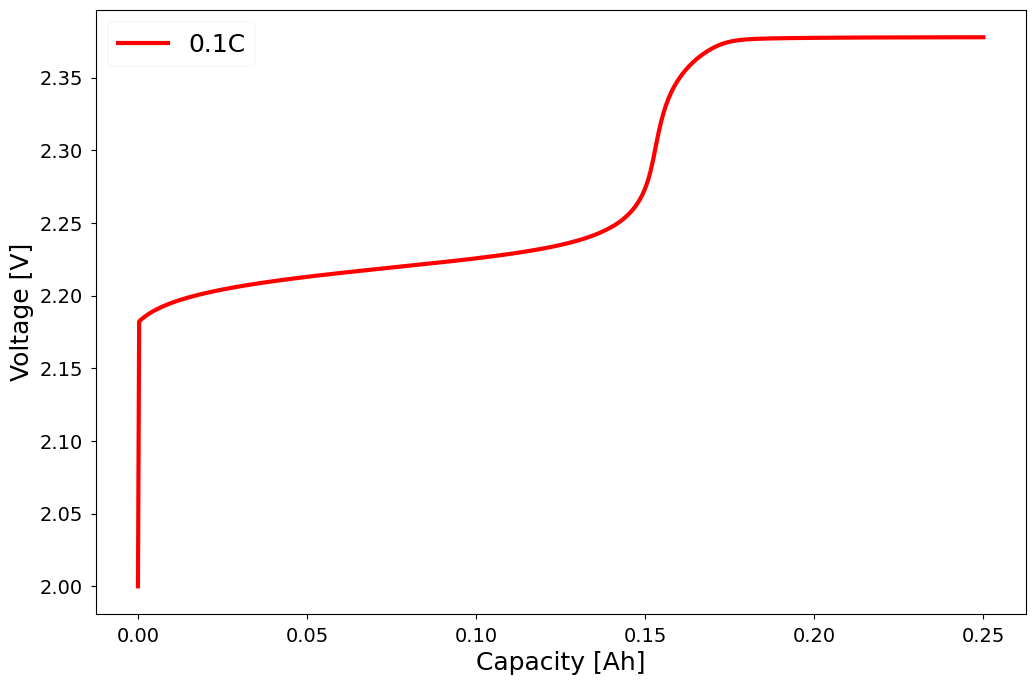

In [5]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

## In general, you can find all parameter keys and values by going to the model-linked csv file or using the following code:

In [6]:
model.default_parameter_values.values

<bound method ParameterValues.values of {'Active reaction area per cell [m2]': 0.96,
 'Ambient Temperature [K]': 298.0,
 'Cell heat capacity [J.g-1.K-1]': 2.0,
 'Cell heat transfer coefficient [W.K-1]': 0.2,
 'Cell mass [g]': 0.129,
 'Cell mass [kg]': 129.0,
 'Current function [A]': 1.0,
 'Density of precipitated Sulfur [g.L-1]': 2000.0,
 'Electrolyte volume per cell [L]': 0.0114,
 'Electron number per reaction [electrons]': 4.0,
 'Exchange current density H [A.m-2]': 10.0,
 'Exchange current density L [A.m-2]': 5.0,
 'Exchange current density M [A.m-2]': 5.0,
 'Initial Cell Temperature [K]': 298.0,
 'Initial Condition for Precipitated Sulfur [g]': 0.43,
 'Initial Condition for S ion [g]': 0.001,
 'Initial Condition for S2 ion [g]': 0.0131131458947208,
 'Initial Condition for S4 ion [g]': 6.3812297536184095e-18,
 'Initial Condition for S8 ion [g]': 4.5372721447883005e-64,
 'Initial Condition for Terminal Voltage [V]': 2.0,
 'Loss rate due to shuttle [s-1]': 0.25,
 'Lower voltage cut-of

## To see what parameter values were used during the simulation in question, use the following code: 

In [7]:
sim.parameter_values

{'Active reaction area per cell [m2]': 0.96,
 'Ambient Temperature [K]': 298.0,
 'Cell heat capacity [J.g-1.K-1]': 2.0,
 'Cell heat transfer coefficient [W.K-1]': 0.2,
 'Cell mass [g]': 0.129,
 'Cell mass [kg]': 129.0,
 'Current function [A]': 1.0,
 'Density of precipitated Sulfur [g.L-1]': 2000.0,
 'Electrolyte volume per cell [L]': 0.0114,
 'Electron number per reaction [electrons]': 4.0,
 'Exchange current density H [A.m-2]': 10.0,
 'Exchange current density L [A.m-2]': 5.0,
 'Exchange current density M [A.m-2]': 5.0,
 'Initial Cell Temperature [K]': 298.0,
 'Initial Condition for Precipitated Sulfur [g]': 0.43,
 'Initial Condition for S ion [g]': 0.001,
 'Initial Condition for S2 ion [g]': 0.0131131458947208,
 'Initial Condition for S4 ion [g]': 6.3812297536184095e-18,
 'Initial Condition for S8 ion [g]': 4.5372721447883005e-64,
 'Initial Condition for Terminal Voltage [V]': 2.0,
 'Loss rate due to shuttle [s-1]': 0.25,
 'Lower voltage cut-off [V]': 1.5,
 'Mass of active sulfur per